In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

df = pd.read_csv('Advertising.csv')
df = df[['TV','Radio','Newspaper','Sales']]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


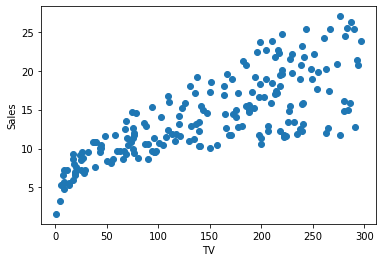

In [26]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [18]:
adv = df.values
clf = linear_model.LinearRegression(fit_intercept=True)
tv = adv[:,:1]
sales = adv[:,3]
clf.fit(tv, sales)
prediccion = clf.predict(tv)

# sd = sqrt(varianza)
# se = sd/sqrt(n)
# MSE = mean squared error      = 1/n . SUM((y - f'(x))**2)
# RSS = residual sum of squared = SUM((y - f'(x))**2)
# TSS = total sum of squared = SUM((y - y_media)**2)
# RSE = residual standard error = sqrt(RSS/(n-p-1)) # Prediccion de la SD de error
# R2 = 1 - (RSS/TSS)
# SE(beta0) = sqrt(RSE**2 . ( 1/n + mean(x)/SUM((x-mean(x))**2))
# SE(beta1) = sqrt(RSE**2 / SUM((x-mean(x))**2))
# t-statistic = (beta1-0)/SE(beta1)
# p-value

n = len(sales)
print("\nAnalisis")
print("=========")
print("Intercept =", clf.intercept_)
print("Coeficiente =", clf.coef_)
print("MSE training scikit= ", mean_squared_error(sales, prediccion))
print("MSE calculado = ", sum((sales - prediccion)**2)/n)
RSS = sum((sales - prediccion)**2)
TSS = sum((sales - np.mean(sales))**2)
R2 = 1 - (RSS/TSS)
print("RSS calculado = ", RSS)
print("TSS calculado = ", TSS)
print("R2 calculado = ", R2)
print("R2 = ",  r2_score(sales, prediccion))
RSE = math.sqrt(RSS/(n-2))
print("RSE calculado = ", RSE)
sum_dif_x_mean_2 = sum((tv-np.mean(tv))**2)
SE_intercept = math.sqrt((RSE**2)/n + (((RSE**2)*np.mean(tv)**2)/sum_dif_x_mean_2))
SE_coeficiente = math.sqrt(RSE**2 / sum_dif_x_mean_2)
print("SE Intercept = ", SE_intercept)
print("SE Coeficiente = ", SE_coeficiente)
print("t Intercept = ", clf.intercept_/SE_intercept)
print("t Coeficiente = ", clf.coef_/SE_coeficiente)
p_coeficiente = 2 * (1 - stats.t.cdf(np.abs(clf.coef_/SE_coeficiente), n-2))
p_intercept = 2 * (1 - stats.t.cdf(np.abs(clf.intercept_/SE_intercept), n-2))
print("P Coeficiente = ", p_coeficiente)
print("P Intercept = ", p_intercept)


Analisis
Intercept = 7.032593549127695
Coeficiente = [0.04753664]
MSE training scikit=  10.512652915656757
MSE calculado =  10.512652915656753
RSS calculado =  2102.530583131351
TSS calculado =  5417.148749999997
R2 calculado =  0.6118750508500709
R2 =  0.611875050850071
RSE calculado =  3.258656368650462
SE Intercept =  0.4578429402734783
SE Coeficiente =  0.002690607187796869
t Intercept =  15.360275174117554
t Coeficiente =  [17.6676256]
P Coeficiente =  [0.]
P Intercept =  0.0


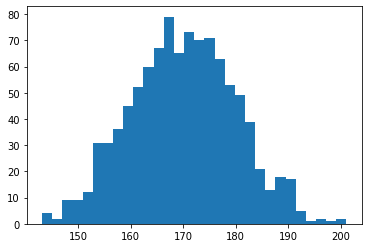

In [31]:
pop = np.random.normal(170, 10, size=1000)

plt.hist(pop, bins=30)
plt.show()

## Standard error

La varianza de la media $\hat\mu$ muestral, es el error estandar al cuadrado, que es la desviacion estandar (aproximada por la desviacion estandar muestral) al cuadrado entre la cantidad de elementos de la muestra.

$
Var(\hat{\mu}) = SE^2 = \frac{\sigma^2}{n}
$

#### Ejemplo:

In [230]:
# Defino una poblacion de 1000 personas. Altura media 170 con desviacion estandar 10
population = np.random.normal(170, 10, 1000)

# Tomo una muestra, calculo la media y el error estandar
n_sample = 10
sample = np.random.choice(population, n_sample, replace=False)
se = np.sqrt(np.std(sample)**2/n_sample)

print(f"Tamano muestra: {n_sample}")
print(f"Media muestral: {round(np.mean(sample), 2)}")
print(f"Error estandar: {round(se, 2)}")

Tamano muestra: 10
Media muestral: 166.42
Error estandar: 3.73


# Exactitud de los parametros

Estando definida la regresion lineal como:

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

El error estandar en el caso de los coeficentes esta definido por:
    
$$SE(\hat{\beta_{0}}) = \sigma^2\left(\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}\right) $$

$$SE(\hat{\beta_{1}}) = \frac{\sigma^2}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}} $$

donde:

$$\sigma^2 = Var(\epsilon) $$

$\sigma$ es desconocido, pero se puede aproximar por $RSE = \sqrt{\frac{RSS}{(n-2)}}$ donde $RSS= \sum_{i=1}^n{(y_i-\bar{y}_i)^2}$

Luego, con los valoes de $SE(\hat{\beta_{0}})$ y $SE(\hat{\beta_{1}})$ se pueden calcular intervalos de confianza para estos parametros. Por ejemplo un intervalo de ~95% de cofianza seria:

$$\left[\hat{\beta_{0}} - 2 . SE(\hat{\beta_{0}}),\hat{\beta_{0}} + 2 . SE(\hat{\beta_{0}})\right]$$ 

Luego, para averiguar si alguno de los parametros $\beta$ es realmente relevante, se calcula a cuantas desviaciones estandar esta de 0, por ejemplo:

$$t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}$$, luego con una distribucion t-student con $n-2$ grados de libertad (si n>30 se puede usar normal) se calcula la probabilidad de que el parametro pueda ser cero. A esto se le llama *p-value*.

# Exactitud del modelo

### RSE

Es un estimado de la desviacion estandar de $\epsilon$

$RSE = \sqrt{\frac{RSS}{(n-2)}}$ donde  $RSS= \sum_{i=1}^n{(y_i-\bar{y}_i)^2}$

### $R^2$

RSE se mide en la misma unidad que $Y$ sin embargo $R^2$ se mide siempre entre 0 y 1.

$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$

donde $TSS = \sum{(y_i - \bar{y})^2}$

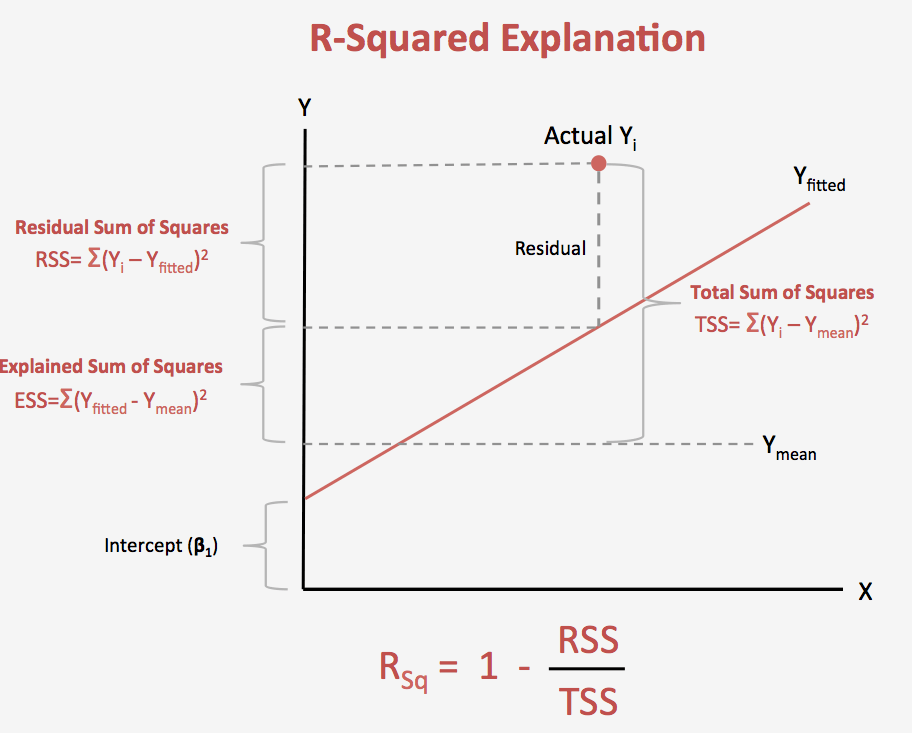